In [4]:
import sqlite3

import os
os.environ["JAVA_HOME"] = "/mnt/extproj/projekte/textmining/jdk/openlogic-openjdk-11.0.22+7-linux-x64"

from collections import defaultdict

from collections import Counter


In [1]:
1+1

2

In [2]:
dbFile = '/mnt/extproj/projekte/textmining/mx_frontend/cons_evidences.db'

In [5]:
con =  sqlite3.connect(dbFile)
cur = con.cursor()

In [6]:
#Total Document with miRNA-gene interaction

a = cur.execute("SELECT count( distinct doc_id) FROM mx_sent")
for x in a:
    print(x)

(102611,)


In [7]:
# Number of different genes
a = cur.execute("SELECT count( distinct gene_family) FROM mx")
for x in a:
    print(x)
    
#Number of different miRNAs (precursor level)
a = cur.execute("SELECT count( distinct mirna_family) FROM mx")
for x in a:
    print(x)

(14113,)
(2018,)


In [11]:
a = cur.execute("SELECT interaction, count(interaction) FROM mx WHERE is_consensus = 1 GROUP BY interaction;")

interactions_overview={}
for x in a:
    print(x)
    interactions_overview[x[0]] = x[1]

('GENE_MIR;DOWN', 9320)
('GENE_MIR;NEU', 43767)
('GENE_MIR;UP', 10464)
('MIR_GENE;DOWN', 53161)
('MIR_GENE;NEU', 117698)
('MIR_GENE;UP', 25294)


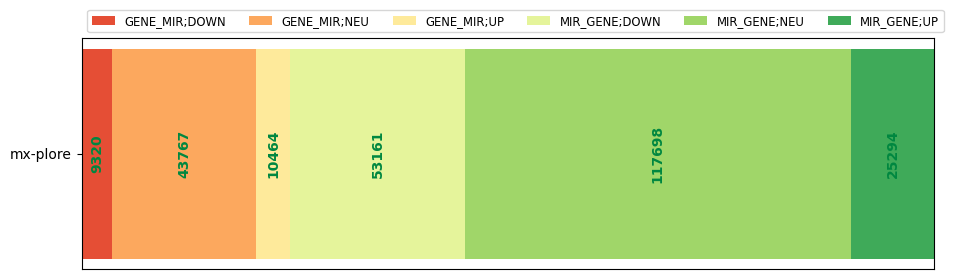

In [21]:
import numpy as np
import matplotlib.pyplot as plt

categories = [x for x in interactions_overview]

results = {
    'mx-plore\ninteraction': [interactions_overview[x] for x in categories],
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(11, 3))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color="#008740", rotation=90, fontweight="bold")
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, categories)
plt.show()

In [9]:
a = cur.execute("SELECT count(distinct concat_ws(' ', gene_family, mirna_family)) FROM mx WHERE is_consensus = 1;")
for x in a:
    print(x)

(196438,)
